#Importe de librerias basicas 

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Vista inicial de los datos

In [ ]:
df = pd.read_csv("/content/train_precios_vivienda.csv")
df.head()

,Unnamed: 0,id,fecha_aprobación,objeto,motivo,proposito,tipo_avaluo,tipo_credito,tipo_subsidio,departamento_inmueble,...,valor_area_construccion,area_otros,valor_area_otros,area_libre,valor_area_libre,valor_total_avaluo,valor_uvr,valor_avaluo_en_uvr,Longitud,Latitud
0,4112,5896,43090.624747,Remate,Remates,GarantÃ­a Hipotecaria,Remates,Vivienda,NaN,VALLE DEL CAUCA,...,"81968750,00",0,0,0,0,"145318750,00",2522304,"576134,95",0.000000,0.000000
1,7401,10570,NaN,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,NaN,QUINDÃO,...,0,157,78500000,No,0,713986654,257.23250000000002,2775647.14,-75.661152,4.544027
2,10223,14600,NaN,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,NaN,ANTIOQUIA,...,0,0,0,Si,0,270500000,259.4264,1042684.94,-75.584116,6.277020
3,4170,5967,43091.676139,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,VIS,CUNDINAMARCA,...,0,0,0,No,0,"84840000,00",252245,"336339,67",0.000000,0.000000
4,11073,15814,NaN,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,VIS,META,...,69306400,0,0,0,0,96346400,259.72770000000003,370951.58,-73.712370,3.565757


In [ ]:
# Obtener el número de filas y columnas del dataframe
num_filas, num_columnas = df.shape

print("El dataframe tiene", num_filas, "filas y", num_columnas, "columnas.")

El dataframe tiene 11571 filas y 222 columnas.


#Tratamiento de las variables 
Se determina eliminar las filas de datos faltantes para que el modelo aprenda de manera correcta a predecir el valor de la variable objetivo

In [ ]:
#Eliminar Campos vacios
df = df.dropna()

In [ ]:
# Obtener el número de filas y columnas del dataframe
num_filas, num_columnas = df.shape

print("El dataframe tiene", num_filas, "filas y", num_columnas, "columnas.")

El dataframe tiene 588 filas y 222 columnas.


#Transformación de las variables más relevantes

In [ ]:

#CAmbio a la variable fecha 
import datetime
import pandas as pd

# fecha de ejemplo como int64
fecha_aprobacion_int64 = 1648442400

# convertir int64 a datetime
fecha_aprobacion = datetime.datetime.fromtimestamp(fecha_aprobacion_int64)

# imprimir fecha en formato legible
print(fecha_aprobacion.strftime('%Y-%m-%d %H:%M:%S'))

# verificar el tipo de datos de la columna fecha_aprobación
print(df['fecha_aprobación'].dtypes)

# convertir la columna a formato de fecha
df['fecha_aprobación'] = pd.to_datetime(df['fecha_aprobación'])

# verificar el nuevo tipo de datos de la columna fecha_aprobación
print(df['fecha_aprobación'].dtypes)

2022-03-28 04:40:00
float64
datetime64[ns]


In [ ]:
#vista a la variable objetivo variable valor de avaluo 
df['valor_total_avaluo'].describe()


count     588
unique    536
top         0
freq       20
Name: valor_total_avaluo, dtype: object

In [ ]:
#cambios a la variable objetivo 
df['valor_total_avaluo'] = df['valor_total_avaluo'].apply(lambda x: float(x.replace('.', '').replace(',', '.')))



In [ ]:
print((df['valor_total_avaluo'].describe()))

count    5.880000e+02
mean     4.016228e+09
std      5.382548e+10
min      0.000000e+00
25%      6.494808e+07
50%      8.203375e+07
75%      9.561754e+07
max      1.035721e+12
Name: valor_total_avaluo, dtype: float64


In [ ]:
#Confirmamos
print((df['valor_total_avaluo'].describe()))

count    5.880000e+02
mean     4.016228e+09
std      5.382548e+10
min      0.000000e+00
25%      6.494808e+07
50%      8.203375e+07
75%      9.561754e+07
max      1.035721e+12
Name: valor_total_avaluo, dtype: float64



#Analisis inicial de la variable objetivo
Tome el diagrama de cajas y bigotes para ver si hay datos que puedan alterar la muestra, de igual manera de encontrarlos se van a eliminar para dar homogeneidad a la base

<Axes: >

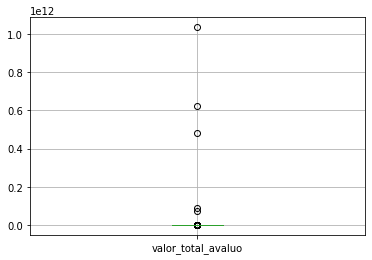

In [ ]:
#antes de empezar vi algunos valores atipicos en la variable x
#vamos a confirmar y los eliminamos para darle homogeneidad a la muesta
%matplotlib inline
df.boxplot('valor_total_avaluo')

In [ ]:
sP = df['valor_total_avaluo']
IQR = 1.5*(sP.quantile(.75)-sP.quantile(.25))
lim_sup = sP.quantile(.75)+IQR
lim_inf = sP.quantile(.25)-IQR

In [ ]:
sP_clean = sP[(sP >= lim_sup) | (sP <= lim_inf)]
sP_clean
df.drop(sP_clean.index)

,Unnamed: 0,id,fecha_aprobación,objeto,motivo,proposito,tipo_avaluo,tipo_credito,tipo_subsidio,departamento_inmueble,...,valor_area_construccion,area_otros,valor_area_otros,area_libre,valor_area_libre,valor_total_avaluo,valor_uvr,valor_avaluo_en_uvr,Longitud,Latitud
3,4170,5967,1970-01-01 00:00:00.000043091,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,VIS,CUNDINAMARCA,...,0,0,0,No,0,84840000.0,252245,"336339,67",0.000000,0.000000
51,3944,5665,1970-01-01 00:00:00.000043084,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,VIS,TOLIMA,...,47600000,0,0,0,0,75500000.0,2.521426E+18,"299433,73",0.000000,0.000000
127,3366,4837,1970-01-01 00:00:00.000043066,Originación,Crédito hipotecario de vivienda,Garantía Hipotecaria,Hipotecario,Vivienda,VIS,"BOGOTÁ, D. C.",...,0,0,0,No,0,99568000.0,2.521124E+18,"394934,96",0.000000,0.000000
132,1744,2485,1970-01-01 00:00:00.000043019,Originación,Crédito hipotecario de vivienda,Garantía Hipotecaria,Hipotecario,Vivienda,VIS,META,...,51300000,0,0,0,0,94050000.0,2519444,"373296,65",0.000000,0.000000
154,651,932,1970-01-01 00:00:00.000042993,Originación,Crédito hipotecario de vivienda,Garantía Hipotecaria,Hipotecario,Vivienda,VIS,ATLÁNTICO,...,0,0,0,No,0,61644140.0,2.516391E+18,"244966,44",0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11456,2568,3695,1970-01-01 00:00:00.000043041,Originación,Crédito hipotecario de vivienda,Garantía Hipotecaria,Hipotecario,Vivienda,VIS,BOYACÁ,...,0,0,0,No,0,75130800.0,2520499,"298082,86",0.000000,0.000000
11495,3073,4419,1970-01-01 00:00:00.000043059,Originación,Crédito hipotecario de vivienda,Garantía Hipotecaria,Hipotecario,Vivienda,VIS,VALLE DEL CAUCA,...,"38228000,0",0,0,0,0,56048000.0,2.521006E+18,"222323,95",0.000000,0.000000
11530,4658,6647,1970-01-01 00:00:00.000043144,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,VIS,QUINDÃO,...,59328000,0,0,0,0,73728000.0,253.49430000000001,290846.78000000003,-75.621039,6.254443
11532,2734,3942,1970-01-01 00:00:00.000043047,Originación,Crédito hipotecario de vivienda,Garantía Hipotecaria,Hipotecario,Vivienda,VIS,ANTIOQUIA,...,0,0,0,Si,0,65715000.0,2520694,"260702,01",0.000000,0.000000


In [ ]:
#cambiar las variables descriptivas a valores booleanos
df['alcantarillado_en_el_sector'] = df['alcantarillado_en_el_sector'].replace({'si': 1, 'no': 0})
df['acueducto_en_el_sector'] = df['acueducto_en_el_sector'].replace({'si': 1, 'no': 0})
df['vias_pavimentadas'] = df['vias_pavimentadas'].replace({'si': 1, 'no': 0})
df['gas_en_el_sector'] = df['gas_en_el_sector'].replace({'si': 1, 'no': 0})
df['energia_en_el_sector'] = df['energia_en_el_sector'].replace({'si': 1, 'no': 0})


In [ ]:
df['alcantarillado_en_el_sector'] = df['alcantarillado_en_el_sector'].astype(bool)
df['acueducto_en_el_sector'] = df['acueducto_en_el_sector'].astype(bool)
df['vias_pavimentadas'] = df['vias_pavimentadas'].astype(bool)
df['gas_en_el_sector'] = df['gas_en_el_sector'].astype(bool)
df['gas_en_el_sector'] = df['gas_en_el_sector'].astype(bool)
df['energia_en_el_sector'] = df['energia_en_el_sector'].astype(bool)


In [ ]:
#nUESTRA VARIABLE OBJETIVO AUN TIENE ERROR Y ES QUE TIENE UN PUNTO Y LA QUEREMOS NUMERICA 


In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
#Confirmamos
print((df['valor_total_avaluo'].describe()))

count             588.00
mean       4016227753.48
std       53825479852.24
min                 0.00
25%          64948075.00
50%          82033750.00
75%          95617537.50
max     1035720540032.00
Name: valor_total_avaluo, dtype: float64


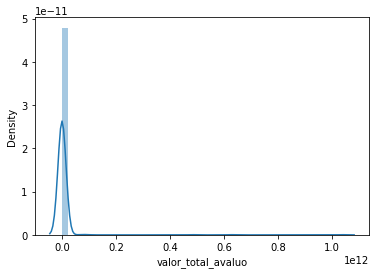

In [ ]:
#Analisis de nuesta x # Histograma:

sns.distplot(df['valor_total_avaluo']);

In [ ]:
# Asimetría y curtosis:

print("Skewness: %f" % df['valor_total_avaluo'].skew())
print("Kurtosis: %f" % df['valor_total_avaluo'].kurt())

Skewness: 15.875003
Kurtosis: 270.561993


In [ ]:
# Obtener todas las columnas de tipo float64
float_cols = list(df.select_dtypes(include=['float64']).columns)
print("Columnas de tipo float64:", float_cols)

# Obtener todas las columnas de tipo object
object_cols = list(df.select_dtypes(include=['object']).columns)
print("Columnas de tipo object:", object_cols)

Columnas de tipo float64: ['matricula_garaje_5', 'matricula_inmobiliaria_deposito_3', 'matricula_inmobiliaria_deposito_4', 'Longitud', 'Latitud']
Columnas de tipo object: ['objeto', 'motivo', 'proposito', 'tipo_avaluo', 'tipo_credito', 'tipo_subsidio', 'departamento_inmueble', 'municipio_inmueble', 'barrio', 'sector', 'direccion_inmueble_informe', 'alcantarillado_en_el_sector', 'acueducto_en_el_sector', 'gas_en_el_sector', 'energia_en_el_sector', 'telefono_en_el_sector', 'vias_pavimentadas', 'sardineles_en_las_vias', 'andenes_en_las_vias', 'estrato', 'barrio_legal', 'topografia_sector', 'condiciones_salubridad', 'transporte', 'demanda_interes', 'paradero', 'alumbrado', 'arborizacion', 'alamedas', 'ciclo_rutas', 'nivel_equipamiento_comercial', 'descripcion_general_sector', 'perspectivas_de_valorizacion', 'actualidad_edificadora', 'comportamiento_oferta_demanda', 'alcantarillado_en_el_predio', 'acueducto_en_el_predio', 'gas_en_el_predio', 'energia_en_el_predio', 'telefono_en_el_predio', 

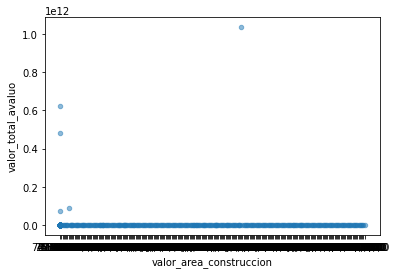

In [ ]:
# Diagrama de dispersión tipo_avaluo/valor_total_avaluo:

var = 'valor_area_construccion'
data = pd.concat([df['valor_total_avaluo'], df[var]], axis=1)
data.plot.scatter(x=var, y='valor_total_avaluo', alpha = 0.5);

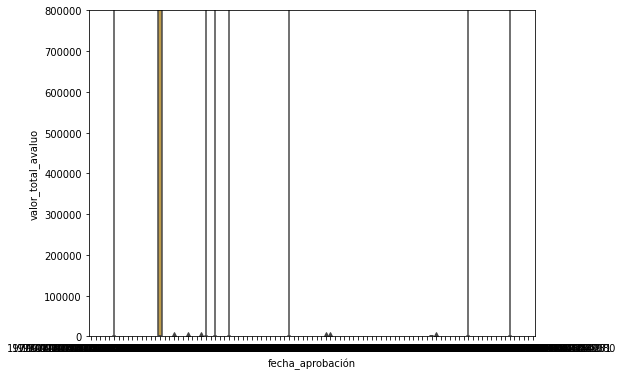

In [ ]:
# Diagrama de cajas fecha_aprobación/saleprice:

var = 'fecha_aprobación'
data = pd.concat([df['valor_total_avaluo'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="valor_total_avaluo", data=data)
fig.axis(ymin=0, ymax=800000);

#Analísis de variables multiples
Se usa para poder determinar cuales seran las variables más influyentes a la hora de determinar el precio de un inmueble

In [ ]:
#Antes de empezar voy a verificar cuales son las variables con mayor correlacion para utilizarlas de varoables predictoras
corr = df.corr()
corr[['valor_total_avaluo']].sort_values(by = 'valor_total_avaluo',ascending = False).style.background_gradient()

,valor_total_avaluo
valor_total_avaluo,1.000000
Longitud,0.042608
patio_interior,0.028444
zona_de_ropas,0.018244
cocina,-0.003185
bodega,-0.004323
oficina,-0.004999
local,-0.006832
bano_servicio,-0.012864
zona_verde_privada,-0.015382


#Modelamiento
Un modelo de regresión lineal es utilizado comúnmente para determinar el precio de una vivienda porque permite examinar la relación entre dos variables continuas: en este caso, el precio de la vivienda y las características de la misma (como el tamaño, la ubicación, el número de habitaciones, entre otros).

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
predictors = ['energia_en_el_sector','gas_en_el_sector','vias_pavimentadas','Longitud','patio_interior','zona_de_ropas','terraza','alcantarillado_en_el_sector','acueducto_en_el_sector']
X = df[predictors]


# Seleccionar variable objetivo
y = df['valor_total_avaluo']

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo de regresión lineal
model = LinearRegression()

# Entrenar modelo con datos de entrenamiento
model.fit(X_train, y_train)

# Evaluar modelo con datos de prueba
score = model.score(X_test, y_test)
print("R2 Score:", score)

R2 Score: -1978.074370525226
